# Relative Pose Regression

In [1]:
!wget https://storage.googleapis.com/niantic-lon-static/research/ace/wayspots.tar.gz

--2024-05-29 12:56:42--  https://storage.googleapis.com/niantic-lon-static/research/ace/wayspots.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.23.123, 142.250.74.219, 142.250.186.187, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.23.123|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1238643613 (1.2G) [application/gzip]
Saving to: ‘wayspots.tar.gz’

wayspots.tar.gz     100%[===================>]   1.15G  5.71MB/s    in 4m 36s  

2024-05-29 13:01:19 (4.29 MB/s) - ‘wayspots.tar.gz’ saved [1238643613/1238643613]



In [ ]:
!tar -xvf wayspots.tar.gz

In [24]:
import os
from PIL import Image
import torch
from torch.utils.data import Dataset
import numpy as np
import matplotlib.pyplot as plt

In [21]:
class WayspotsDataset(Dataset):
    def __init__(self, root_dir, scene="bears", split="train", transform=None):
        self.root_dir = root_dir
        self.scene = scene
        self.split = split
        self.transform = transform

        self.rgb_dir = os.path.join(root_dir, scene, split, "rgb")
        self.poses_dir = os.path.join(root_dir, scene, split, "poses")
        self.calibration_dir = os.path.join(root_dir, scene, split, "calibration")

        self.samples = os.listdir(self.rgb_dir)

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        base_name = self.samples[idx].replace("frame_", "")

        img_name = os.path.join(self.rgb_dir, "frame_" + base_name)
        image = Image.open(img_name)

        pose_name = os.path.join(
            self.poses_dir, "pose_" + base_name.replace(".jpg", ".txt")
        )
        pose = np.loadtxt(pose_name)
        pose = torch.tensor(pose)

        calibration_name = os.path.join(
            self.calibration_dir, "calibration_" + base_name.replace(".jpg", ".txt")
        )
        calibration = np.loadtxt(calibration_name)
        calibration = torch.tensor(calibration)

        sample = {"image": image, "pose": pose, "calibration": calibration}

        if self.transform:
            sample = self.transform(sample)

        return sample

In [22]:
dataset = WayspotsDataset("../data/wayspots", scene="wayspots_bears", split="train")

In [25]:
def show_all_info(dataset_item):
    img = dataset_item["image"]
    pose = dataset_item["pose"]
    calibration = dataset_item["calibration"]

    print("Image shape:", img.size)
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis("off")
    plt.show()

    print("Pose: ", pose)
    print("Calibration: ", calibration)

Image shape: (720, 540)


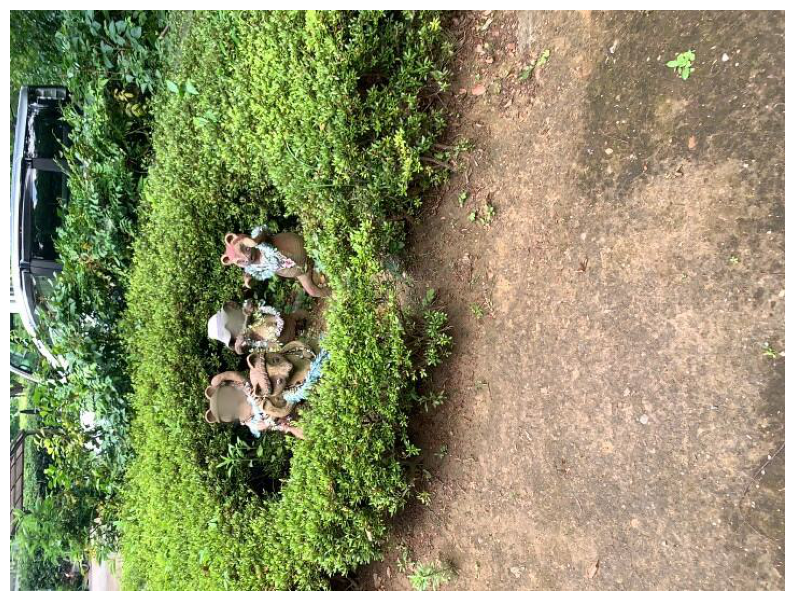

Pose:  tensor([[-0.0606, -0.9797,  0.1910, -0.1016],
        [ 0.8845,  0.0359,  0.4651, -0.1690],
        [-0.4625,  0.1971,  0.8644, -1.2685],
        [ 0.0000,  0.0000,  0.0000,  1.0000]], dtype=torch.float64)
Calibration:  tensor(550.5007, dtype=torch.float64)


In [29]:
show_all_info(dataset[0])